### Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings("ignore")


### Importing the data

In [3]:
# Loading the data
FC_data = pd.read_csv("C:/Users/prajw/Desktop/Undergrad Research/Datasets/Preprocessed FC/Merged_FC.csv", index_col = 0)
FC_data.index.name = "Subject ID"
FC_data.head()

FC_pheno_data = pd.read_csv("C:/Users/prajw/Desktop/Undergrad Research/Datasets/Preprocessed FC matrix with Pheno/FC_Merged.csv", index_col = 0)
FC_pheno_data.index.name = "Subject ID"
FC_pheno_data.head()

FC_PCA = pd.read_csv("C:/Users/prajw/Desktop/Undergrad Research/Datasets/Preprocessed FC matrix with PCA extracted data/PCA_feature.csv", index_col = 0)
FC_PCA.index.name = "Subject ID"
FC_PCA.head()

Reho = pd.read_csv("C:/Users/prajw/Desktop/Undergrad Research/Datasets/Preprocessed ReHo/All_ReHo.csv", index_col = 0)
Reho.index.name = "Subject ID"
Reho.head()

falff = pd.read_csv("C:/Users/prajw/Desktop/Undergrad Research/Datasets/Preprocessed fALFF/All_falff.csv", index_col = 0)
falff.index.name = "Subject ID"
falff.head()

,DX,0,1,2,3,4,5,6,7,8,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0,0.082767,-0.202121,-0.253291,0.143162,-0.212533,0.572503,-0.346531,0.010921,0.014705,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1019436,3,0.216872,-0.055456,0.274632,0.057173,0.318357,0.334924,-0.285290,-0.093749,0.051842,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
1043241,0,-0.060757,0.218841,-0.220541,-0.009787,-0.018797,0.102055,-0.207456,-0.332605,0.157679,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
1266183,0,-0.063801,0.061519,-0.011792,0.016329,0.135984,0.164675,0.174189,-0.108558,-0.031854,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
1535233,0,0.022708,0.380467,0.404897,0.422225,0.546707,-0.022366,0.218834,0.274712,0.191838,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268


,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status,0,1,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0,44.0,47.0,44.0,99.0,115.0,103.0,1,0.082767,-0.202121,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1019436,3,71.0,60.0,66.0,124.0,108.0,122.0,1,0.216872,-0.055456,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
1043241,0,40.0,40.0,43.0,128.0,106.0,120.0,1,-0.060757,0.218841,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
1266183,0,47.0,44.0,43.0,136.0,96.0,120.0,1,-0.063801,0.061519,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
1535233,0,42.0,41.0,43.0,106.0,135.0,122.0,1,0.022708,0.380467,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC480,PC481,PC482,PC483,PC484,PC485,PC486,PC487,PC488,DX
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,-19.214669,28.933982,7.124812,-4.864777,-0.918411,1.556838,-33.216430,3.703853,25.597683,1.954574,...,-0.703743,1.431570,0.585098,1.311178,2.560978,1.058323,0.699934,-2.087027,0.238786,0
1019436,-18.864300,-40.754030,-33.519231,13.250311,-0.775394,0.647756,-12.077802,-19.265826,22.666633,-2.840693,...,0.590804,-4.186011,-1.626872,-5.879905,-1.606961,-1.246036,-1.583198,0.242572,2.373836,3
1043241,7.846577,20.948205,-36.247873,20.999480,16.510235,17.077271,-2.285614,-1.724268,14.021748,-16.138031,...,0.754514,-1.506335,1.275221,-0.766122,-4.018175,2.018278,0.826163,-2.245247,1.847750,0
1266183,-8.407607,32.852001,-19.645893,13.501739,-2.173091,4.952939,-10.915426,2.953900,-3.423763,11.618529,...,-1.469141,-2.070394,-0.410683,-1.465609,0.479998,1.876242,-0.523378,1.685966,0.783129,0
1535233,-2.888877,5.990861,-8.160449,30.408660,44.460316,12.253571,-0.593780,9.542005,23.975279,15.386297,...,-1.053952,2.432530,-0.439854,0.909798,1.141703,0.357122,3.979956,1.749881,-4.279552,0


,ScanDir ID,DX,ReHo_1,ReHo_2,ReHo_3,ReHo_4,ReHo_5,ReHo_6,ReHo_7,ReHo_8,...,ReHo_181,ReHo_182,ReHo_183,ReHo_184,ReHo_185,ReHo_186,ReHo_187,ReHo_188,ReHo_189,ReHo_190
Subject ID,,,,,,,,,,,,,,,,,,,,,
0,1018959,0,-0.000693,-0.002784,0.005485,0.013734,0.009531,0.012442,0.015524,0.004018,...,-0.000228,-0.004366,0.007430,0.014627,0.001317,-0.006228,0.001716,-0.000210,-0.012670,-0.006496
1,1019436,3,0.001641,0.000157,-0.000600,0.008507,-0.005215,0.021348,0.037630,-0.002221,...,0.005336,0.026657,-0.010433,0.010363,0.016745,0.020867,-0.026912,-0.010929,0.002073,-0.014229
2,1043241,0,-0.025526,-0.007973,-0.003846,-0.008930,0.002580,0.012220,0.027966,0.006901,...,-0.004057,0.029532,0.017034,0.011103,-0.010745,-0.009088,0.008249,-0.008181,-0.001200,-0.007629
3,1266183,0,0.017338,-0.020910,0.026822,-0.028537,0.004145,0.018429,0.023084,0.018687,...,-0.009916,0.024002,0.001976,-0.016781,0.019819,0.008669,0.015358,-0.016745,-0.011874,0.012493
4,1535233,0,0.025408,-0.004181,0.019778,0.010639,0.042414,0.037103,0.037410,0.053010,...,-0.033017,-0.009099,-0.008167,-0.052603,0.034772,-0.018005,0.037081,0.002573,0.026957,0.030917


,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,DX
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0.440059,0.654038,0.604660,0.539188,0.427841,0.556644,0.456504,0.500982,0.631251,0.613161,...,0.375033,0.613263,0.645600,0.468351,0.381020,0.650361,0.684567,0.676759,0.612947,0
1019436,0.756351,0.527825,0.619720,0.466123,0.497030,0.384478,0.546645,0.465267,0.588696,0.561305,...,0.492485,0.475318,0.603202,0.554377,0.620290,0.637574,0.674873,0.568847,0.609281,3
1043241,0.730804,0.413692,0.591623,0.642186,0.434255,0.555075,0.479140,0.540595,0.621012,0.618000,...,0.584502,0.637769,0.727549,0.557828,0.637839,0.755363,0.547045,0.572328,0.555771,0
1266183,0.324953,0.566304,0.556289,0.538490,0.495830,0.416628,0.328429,0.372241,0.477356,0.531180,...,0.448431,0.631884,0.497536,0.458568,0.515995,0.474847,0.524475,0.535504,0.719011,0
1535233,0.544618,0.434999,0.646133,0.715492,0.669921,0.582833,0.459039,0.543931,0.610697,0.451788,...,0.539778,0.641483,0.671250,0.642956,0.653623,0.727645,0.405513,0.391241,0.657757,0


In [4]:
FC_data['DX'] = FC_data['DX'].apply(lambda x: 1 if x > 0 else 0)
FC_pheno_data['DX'] = FC_pheno_data['DX'].apply(lambda x: 1 if x > 0 else 0)
FC_PCA['DX'] = FC_PCA['DX'].apply(lambda x: 1 if x > 0 else 0)
Reho['DX'] = Reho['DX'].apply(lambda x: 1 if x > 0 else 0)
falff['DX'] = falff['DX'].apply(lambda x: 1 if x > 0 else 0)

FC_data
FC_PCA
FC_pheno_data
Reho
falff

,DX,0,1,2,3,4,5,6,7,8,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0,0.082767,-0.202121,-0.253291,0.143162,-0.212533,0.572503,-0.346531,0.010921,0.014705,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1019436,1,0.216872,-0.055456,0.274632,0.057173,0.318357,0.334924,-0.285290,-0.093749,0.051842,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
1043241,0,-0.060757,0.218841,-0.220541,-0.009787,-0.018797,0.102055,-0.207456,-0.332605,0.157679,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
1266183,0,-0.063801,0.061519,-0.011792,0.016329,0.135984,0.164675,0.174189,-0.108558,-0.031854,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
1535233,0,0.022708,0.380467,0.404897,0.422225,0.546707,-0.022366,0.218834,0.274712,0.191838,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669389,0,-0.136454,-0.065583,0.017311,0.052200,0.460014,0.306935,0.176286,-0.345477,0.164890,...,0.206593,0.249444,-0.039177,0.034391,0.666300,0.386416,0.166788,0.555021,0.308751,0.346726
6383713,1,0.004203,-0.314136,-0.223007,0.475450,0.595427,0.529921,-0.154340,-0.193150,-0.176574,...,0.274156,0.141414,-0.183968,-0.383677,0.533130,0.236219,0.114466,0.385278,0.143373,0.421396
6477085,0,-0.619545,-0.075170,-0.074883,0.100222,0.329930,0.071147,-0.110990,0.133600,-0.494886,...,0.137766,0.480185,0.059669,0.074272,0.309700,0.376793,0.156937,0.225204,0.034719,0.042565


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC480,PC481,PC482,PC483,PC484,PC485,PC486,PC487,PC488,DX
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,-19.214669,28.933982,7.124812,-4.864777,-0.918411,1.556838,-33.216430,3.703853,25.597683,1.954574,...,-0.703743,1.431570,0.585098,1.311178,2.560978,1.058323,0.699934,-2.087027,0.238786,0
1019436,-18.864300,-40.754030,-33.519231,13.250311,-0.775394,0.647756,-12.077802,-19.265826,22.666633,-2.840693,...,0.590804,-4.186011,-1.626872,-5.879905,-1.606961,-1.246036,-1.583198,0.242572,2.373836,1
1043241,7.846577,20.948205,-36.247873,20.999480,16.510235,17.077271,-2.285614,-1.724268,14.021748,-16.138031,...,0.754514,-1.506335,1.275221,-0.766122,-4.018175,2.018278,0.826163,-2.245247,1.847750,0
1266183,-8.407607,32.852001,-19.645893,13.501739,-2.173091,4.952939,-10.915426,2.953900,-3.423763,11.618529,...,-1.469141,-2.070394,-0.410683,-1.465609,0.479998,1.876242,-0.523378,1.685966,0.783129,0
1535233,-2.888877,5.990861,-8.160449,30.408660,44.460316,12.253571,-0.593780,9.542005,23.975279,15.386297,...,-1.053952,2.432530,-0.439854,0.909798,1.141703,0.357122,3.979956,1.749881,-4.279552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669389,-25.192405,23.763625,0.439288,-19.330222,-5.943365,4.132156,13.521360,-3.090829,-8.409153,3.890844,...,1.738851,0.762071,-1.074093,1.240432,1.407384,-0.274875,-2.584719,-2.105952,1.334007,0
6383713,2.900486,14.632304,-1.745459,-9.719283,-0.480417,-2.942394,22.701577,-19.565588,-28.477635,0.433893,...,4.079099,-0.999738,3.894240,0.091074,-0.708024,0.313769,3.343667,-2.401685,-0.421493,1
6477085,13.228229,-2.859517,-12.090537,7.090276,34.539183,-1.278220,28.161854,0.327277,-19.166537,-6.277526,...,2.445118,3.092194,-4.391620,1.781686,3.571165,0.911019,-3.847577,3.476473,1.880725,0


,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status,0,1,...,17945,17946,17947,17948,17949,17950,17951,17952,17953,17954
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0,44.0,47.0,44.0,99.0,115.0,103.0,1,0.082767,-0.202121,...,0.112687,0.171248,-0.073971,-0.413591,0.238855,0.300857,0.177778,0.658069,-0.052805,0.145006
1019436,1,71.0,60.0,66.0,124.0,108.0,122.0,1,0.216872,-0.055456,...,-0.466976,-0.189028,0.048556,-0.476408,0.064047,-0.008339,0.424513,0.450524,-0.022595,0.231871
1043241,0,40.0,40.0,43.0,128.0,106.0,120.0,1,-0.060757,0.218841,...,-0.118490,-0.123154,-0.287799,-0.404065,0.111559,-0.233413,-0.120683,0.083335,-0.058685,0.343333
1266183,0,47.0,44.0,43.0,136.0,96.0,120.0,1,-0.063801,0.061519,...,-0.256891,-0.414658,-0.549495,0.543498,0.292311,0.164908,-0.031181,0.084472,-0.235999,-0.609832
1535233,0,42.0,41.0,43.0,106.0,135.0,122.0,1,0.022708,0.380467,...,-0.238173,-0.059068,-0.020537,-0.465405,0.143333,0.194637,0.410916,0.510831,-0.106011,0.137268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669389,0,24.0,15.0,9.0,120.0,97.0,110.0,1,-0.136454,-0.065583,...,0.206593,0.249444,-0.039177,0.034391,0.666300,0.386416,0.166788,0.555021,0.308751,0.346726
6383713,1,61.0,29.0,32.0,115.0,91.0,104.0,1,0.004203,-0.314136,...,0.274156,0.141414,-0.183968,-0.383677,0.533130,0.236219,0.114466,0.385278,0.143373,0.421396
6477085,0,25.0,13.0,12.0,115.0,112.0,115.0,1,-0.619545,-0.075170,...,0.137766,0.480185,0.059669,0.074272,0.309700,0.376793,0.156937,0.225204,0.034719,0.042565


,ScanDir ID,DX,ReHo_1,ReHo_2,ReHo_3,ReHo_4,ReHo_5,ReHo_6,ReHo_7,ReHo_8,...,ReHo_181,ReHo_182,ReHo_183,ReHo_184,ReHo_185,ReHo_186,ReHo_187,ReHo_188,ReHo_189,ReHo_190
Subject ID,,,,,,,,,,,,,,,,,,,,,
0,1018959,0,-0.000693,-0.002784,0.005485,0.013734,0.009531,0.012442,0.015524,0.004018,...,-0.000228,-0.004366,0.007430,0.014627,0.001317,-0.006228,0.001716,-0.000210,-0.012670,-0.006496
1,1019436,1,0.001641,0.000157,-0.000600,0.008507,-0.005215,0.021348,0.037630,-0.002221,...,0.005336,0.026657,-0.010433,0.010363,0.016745,0.020867,-0.026912,-0.010929,0.002073,-0.014229
2,1043241,0,-0.025526,-0.007973,-0.003846,-0.008930,0.002580,0.012220,0.027966,0.006901,...,-0.004057,0.029532,0.017034,0.011103,-0.010745,-0.009088,0.008249,-0.008181,-0.001200,-0.007629
3,1266183,0,0.017338,-0.020910,0.026822,-0.028537,0.004145,0.018429,0.023084,0.018687,...,-0.009916,0.024002,0.001976,-0.016781,0.019819,0.008669,0.015358,-0.016745,-0.011874,0.012493
4,1535233,0,0.025408,-0.004181,0.019778,0.010639,0.042414,0.037103,0.037410,0.053010,...,-0.033017,-0.009099,-0.008167,-0.052603,0.034772,-0.018005,0.037081,0.002573,0.026957,0.030917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,5669389,0,0.041583,0.031368,0.018500,0.003853,0.005902,0.035916,0.007781,0.037332,...,0.029162,-0.003820,0.023286,-0.027044,0.047881,-0.004888,0.033479,0.043651,0.021794,0.022059
616,6383713,1,-0.011001,0.023553,0.045278,0.023125,-0.010543,0.009812,-0.002366,0.047632,...,0.023663,-0.011299,0.034275,0.012848,0.053413,-0.014896,0.022261,0.042729,0.033602,0.029257
617,6477085,0,-0.090311,0.077690,0.036559,-0.020320,0.005736,-0.015036,-0.008798,0.056555,...,0.046824,0.049709,0.059777,0.007273,0.057467,0.073680,0.053626,0.080742,0.041598,0.056369


,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,DX
Subject ID,,,,,,,,,,,,,,,,,,,,,
1018959,0.440059,0.654038,0.604660,0.539188,0.427841,0.556644,0.456504,0.500982,0.631251,0.613161,...,0.375033,0.613263,0.645600,0.468351,0.381020,0.650361,0.684567,0.676759,0.612947,0
1019436,0.756351,0.527825,0.619720,0.466123,0.497030,0.384478,0.546645,0.465267,0.588696,0.561305,...,0.492485,0.475318,0.603202,0.554377,0.620290,0.637574,0.674873,0.568847,0.609281,1
1043241,0.730804,0.413692,0.591623,0.642186,0.434255,0.555075,0.479140,0.540595,0.621012,0.618000,...,0.584502,0.637769,0.727549,0.557828,0.637839,0.755363,0.547045,0.572328,0.555771,0
1266183,0.324953,0.566304,0.556289,0.538490,0.495830,0.416628,0.328429,0.372241,0.477356,0.531180,...,0.448431,0.631884,0.497536,0.458568,0.515995,0.474847,0.524475,0.535504,0.719011,0
1535233,0.544618,0.434999,0.646133,0.715492,0.669921,0.582833,0.459039,0.543931,0.610697,0.451788,...,0.539778,0.641483,0.671250,0.642956,0.653623,0.727645,0.405513,0.391241,0.657757,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669389,0.256059,0.476082,0.668876,0.450693,0.398631,0.544864,0.429395,0.567268,0.646345,0.525099,...,0.316761,0.561301,0.515058,0.305818,0.312659,0.622423,0.618545,0.537619,0.563718,0
6383713,0.229875,0.445956,0.446567,0.515856,0.507962,0.443237,0.339974,0.519716,0.503483,0.485144,...,0.332223,0.643870,0.490933,0.395509,0.346755,0.377433,0.524141,0.334546,0.418346,1
6477085,0.340038,0.422289,0.542378,0.624692,0.546239,0.549973,0.443172,0.644051,0.535838,0.474425,...,0.383385,0.465567,0.499877,0.352168,0.394593,0.424113,0.480928,0.514339,0.584390,0


#### Using Cross Validation and training the model

##### Hyperparameter Optimization with Randomized Search (Decision Tree)

In this section, we perform **hyperparameter tuning** on a **Decision Tree classifier** using **RandomizedSearchCV** from scikit-learn. The tuning is conducted on the *Functional Connectivity + Phenotypic* dataset to identify the best combination of model parameters and then apply the optimized model to other feature sets (FC, PCA, ReHo, and fALFF).

##### What is being done?

- We use **RandomizedSearchCV** to search over a defined range of Decision Tree hyperparameters including:
  - Tree depth (`max_depth`)
  - Splitting criteria (`min_samples_split`, `min_samples_leaf`)
  - Feature selection per split (`max_features`)
  - Split quality measure (`criterion`: gini or entropy)
  - **Pruning control** (`ccp_alpha`) to reduce overfitting
- A **Decision Tree Classifier** is used with class balancing enabled via `class_weight='balanced'`.
- The search is performed over 25 random combinations, using **10-fold Stratified Cross-Validation** to ensure reliable model evaluation while preserving class distribution.

##### Why is this important?

- Decision Trees are prone to **overfitting** if not properly tuned, especially on high-dimensional neuroimaging data.
- **Cost-complexity pruning (`ccp_alpha`)** helps reduce unnecessary tree complexity while maintaining performance.
- **RandomizedSearchCV** is a computationally efficient way to explore hyperparameter combinations without exhaustively searching all possibilities.

##### Expected Outcome

- Identification of the **best-performing hyperparameters** for the Decision Tree classifier.
- Improved **f1-score** and overall classification metrics by controlling tree growth and complexity.
- Deployment of the optimized model across all feature types to evaluate which representation (FC, PCA, ReHo, or fALFF) is most effective for ADHD classification.


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

# Define scoring metrics
scorings = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Define hyperparameter space including pruning (ccp_alpha)
param_dist = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.linspace(0.0, 0.02, 10)  # Cost-complexity pruning values
}

#results = []


#### Functional Connectivity Data 

In [29]:
X_FC = FC_data.drop(columns = "DX")
y_FC = FC_data["DX"]

X_train_FC, X_test_FC, y_train_FC, y_test_FC = train_test_split(X_FC, y_FC, test_size = 0.2, 
                                                    stratify = y_FC, random_state = 45)

scaler = StandardScaler()
X_trs_FC = scaler.fit_transform(X_train_FC)
X_tes_FC = scaler.transform(X_test_FC)

base_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 45)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring= scorings,
    refit = 'f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

random_search.fit(X_trs_FC, y_train_FC)
y_pred_FC = random_search.best_estimator_.predict(X_tes_FC)

print("Functional Connectivity Matrix")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_FC, y_pred_FC, digits = 4))

results.append({
    'Dataset': 'Functional Connectivity',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    "Test F1": f1_score(y_test_FC, y_pred_FC, average = 'weighted')
})

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

Functional Connectivity Matrix
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'entropy', 'ccp_alpha': 0.02}
Best CV F1 Score: 0.5818
              precision    recall  f1-score   support

           0     0.6071    0.5000    0.5484        68
           1     0.5000    0.6071    0.5484        56

    accuracy                         0.5484       124
   macro avg     0.5536    0.5536    0.5484       124
weighted avg     0.5588    0.5484    0.5484       124



#### Functional Connectivity with Phenotype data

In [28]:
# Split features and target
X_FC_pheno = FC_pheno_data.drop(columns="DX")
y_FC_pheno = FC_pheno_data["DX"]

# Train-test split
X_train_FCp, X_test_FCp, y_train_FCp, y_test_FCp = train_test_split(
    X_FC_pheno, y_FC_pheno, test_size=0.2, stratify=y_FC_pheno, random_state=45
)

# Feature scaling
scaler = StandardScaler()
X_trs_FCp = scaler.fit_transform(X_train_FCp)
X_tes_FCp = scaler.transform(X_test_FCp)

# Initialize model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

# Grid search with CV and multiple metrics
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,       
    refit='f1',            
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Fit on training set
random_search.fit(X_trs_FCp, y_train_FCp)

# Predict on test set (NOT training set!)
y_pred_FCp = random_search.best_estimator_.predict(X_tes_FCp)

# Print results
print(" Functional Connectivity + Phenotype")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_FCp, y_pred_FCp, digits=4))


results.append({
    'Dataset': 'FC + Phenotype',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_FCp, y_pred_FCp, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

 Functional Connectivity + Phenotype
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy', 'ccp_alpha': 0.02}
Best CV F1 Score: 0.8909
              precision    recall  f1-score   support

           0     0.9074    0.8909    0.8991        55
           1     0.8667    0.8864    0.8764        44

    accuracy                         0.8889        99
   macro avg     0.8870    0.8886    0.8877        99
weighted avg     0.8893    0.8889    0.8890        99



#### PCA Functional Connectivity

In [33]:
# Separate features and labels
X_PCA = FC_PCA.drop(columns="DX")
y_PCA = FC_PCA["DX"]

# Train-test split
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(
    X_PCA, y_PCA, test_size=0.2, stratify=y_PCA, random_state=45
)

# Standard scaling
scaler = StandardScaler()
X_trs_PCA = scaler.fit_transform(X_train_PCA)
X_tes_PCA = scaler.transform(X_test_PCA)

# Base model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

# Randomized search with single scoring metric (same as FC style)
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,       
    refit='f1',  
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Fit model
random_search.fit(X_trs_PCA, y_train_PCA)

# Predict on test set
y_pred_PCA = random_search.best_estimator_.predict(X_tes_PCA)

# Output
print("PCA-FC Only")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_PCA, y_pred_PCA, digits=4))

# Store results
results.append({
    'Dataset': 'PCA-FC Only',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_PCA, y_pred_PCA, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

PCA-FC Only
Best Params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best CV F1 Score: 0.5528
              precision    recall  f1-score   support

           0     0.5439    0.4559    0.4960        68
           1     0.4478    0.5357    0.4878        56

    accuracy                         0.4919       124
   macro avg     0.4958    0.4958    0.4919       124
weighted avg     0.5005    0.4919    0.4923       124



#### ReHo

In [36]:
# Separate features and target
X_Reho = Reho.drop(columns=["DX", "ScanDir ID"])
y_Reho = Reho["DX"]

# Train-test split
X_train_Reho, X_test_Reho, y_train_Reho, y_test_Reho = train_test_split(
    X_Reho, y_Reho, test_size=0.2, stratify=y_Reho, random_state=45
)

# Feature scaling
scaler = StandardScaler()
X_trs_Reho = scaler.fit_transform(X_train_Reho)
X_tes_Reho = scaler.transform(X_test_Reho)

# Base model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

# Randomized search with multiple scoring metrics and refit
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Fit the model
random_search.fit(X_trs_Reho, y_train_Reho)

# Predict on test set
y_pred_Reho = random_search.best_estimator_.predict(X_tes_Reho)

# Output evaluation
print("ReHo Only")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_Reho, y_pred_Reho, digits=4))

# Store results
results.append({
    'Dataset': 'ReHo Only',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_Reho, y_pred_Reho, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

ReHo Only
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.0044444444444444444}
Best CV F1 Score: 0.5932
              precision    recall  f1-score   support

           0     0.5821    0.5735    0.5778        68
           1     0.4912    0.5000    0.4956        56

    accuracy                         0.5403       124
   macro avg     0.5367    0.5368    0.5367       124
weighted avg     0.5411    0.5403    0.5407       124



#### fALFF

In [39]:
# Separate features and target
X_falff = falff.drop(columns="DX")
y_falff = falff["DX"]

# Train-test split
X_train_falff, X_test_falff, y_train_falff, y_test_falff = train_test_split(
    X_falff, y_falff, test_size=0.2, stratify=y_falff, random_state=45
)

# Feature scaling
scaler = StandardScaler()
X_trs_falff = scaler.fit_transform(X_train_falff)
X_tes_falff = scaler.transform(X_test_falff)

# Base model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

# Randomized search with multiple metrics
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Fit model
random_search.fit(X_trs_falff, y_train_falff)

# Predict on test set
y_pred_falff = random_search.best_estimator_.predict(X_tes_falff)

# Evaluation
print("fALFF Only")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_falff, y_pred_falff, digits=4))

# Log results
results.append({
    'Dataset': 'fALFF Only',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_falff, y_pred_falff, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

fALFF Only
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Best CV F1 Score: 0.5813
              precision    recall  f1-score   support

           0     0.5857    0.6029    0.5942        68
           1     0.5000    0.4821    0.4909        56

    accuracy                         0.5484       124
   macro avg     0.5429    0.5425    0.5426       124
weighted avg     0.5470    0.5484    0.5476       124



In [41]:
FC_pheno_data.columns
FC_pheno_data.shape

Index(['DX', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'Verbal IQ',
       'Performance IQ', 'Full4 IQ', 'Med Status', '0', '1',
       ...
       '17945', '17946', '17947', '17948', '17949', '17950', '17951', '17952',
       '17953', '17954'],
      dtype='object', length=17963)

(493, 17963)

#### Merging the phenotypic data with PCA, ReHo and fALFF

In [11]:
# Step 1: Select phenotype columns and keep index aligned
phenotype_cols = ['Inattentive', 'Hyper/Impulsive', 'Verbal IQ', 
                  'Performance IQ', 'Full4 IQ', 'Med Status']

# Extract phenotype subset from FC + Pheno data
pheno_subset = FC_pheno_data[phenotype_cols].copy()
pheno_subset.index.name = 'Subject ID'

# Step 2: Align indexes for merging
# ReHo needs 'ScanDir ID' as index
ReHo_cleaned = Reho.set_index('ScanDir ID')  # Only ReHo has ScanDir ID
fALFF_cleaned = falff.copy()                 # Already has Subject ID as index
PCA_cleaned = FC_PCA.copy()                  # Already has Subject ID as index

# Step 3: Merge with phenotype subset
ReHo_pheno = ReHo_cleaned.join(pheno_subset, how='inner')
fALFF_pheno = fALFF_cleaned.join(pheno_subset, how='inner')
PCA_pheno = PCA_cleaned.join(pheno_subset, how='inner')

# Step 4: Report shapes
print("Subjects in all merged datasets:", 
      len(set(ReHo_pheno.index) & set(fALFF_pheno.index) & set(PCA_pheno.index)))
print("ReHo+Pheno shape:", ReHo_pheno.shape)
print("fALFF+Pheno shape:", fALFF_pheno.shape)
print("PCA+Pheno shape:", PCA_pheno.shape)


Subjects in all merged datasets: 493
ReHo+Pheno shape: (493, 197)
fALFF+Pheno shape: (493, 197)
PCA+Pheno shape: (493, 495)


### Retraining the Model for new PCA, ReHo and fALFF data

#### PCA + Phenotype

In [46]:
X_PCAph = PCA_pheno.drop(columns="DX")
y_PCAph = PCA_pheno["DX"]

X_train_PCAph, X_test_PCAph, y_train_PCAph, y_test_PCAph = train_test_split(
    X_PCAph, y_PCAph, test_size=0.2, stratify=y_PCAph, random_state=45
)

scaler = StandardScaler()
X_trs_PCAph = scaler.fit_transform(X_train_PCAph)
X_tes_PCAph = scaler.transform(X_test_PCAph)

base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

random_search.fit(X_trs_PCAph, y_train_PCAph)
y_pred_PCAph = random_search.best_estimator_.predict(X_tes_PCAph)

print("PCA + Phenotype")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_PCAph, y_pred_PCAph, digits=4))

results.append({
    'Dataset': 'PCA + Phenotype',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_PCAph, y_pred_PCAph, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

PCA + Phenotype
Best Params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.02}
Best CV F1 Score: 0.9389
              precision    recall  f1-score   support

           0     0.9615    0.9091    0.9346        55
           1     0.8936    0.9545    0.9231        44

    accuracy                         0.9293        99
   macro avg     0.9276    0.9318    0.9288        99
weighted avg     0.9314    0.9293    0.9295        99



#### ReHo + Phenotype

In [49]:
X_Rehop = ReHo_pheno.drop(columns="DX")
y_Rehop = ReHo_pheno["DX"]

X_train_Rehop, X_test_Rehop, y_train_Rehop, y_test_Rehop = train_test_split(
    X_Rehop, y_Rehop, test_size=0.2, stratify=y_Rehop, random_state=45
)

scaler = StandardScaler()
X_trs_Rehop = scaler.fit_transform(X_train_Rehop)
X_tes_Rehop = scaler.transform(X_test_Rehop)

base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

random_search.fit(X_trs_Rehop, y_train_Rehop)
y_pred_Rehop = random_search.best_estimator_.predict(X_tes_Rehop)

print("ReHo + Phenotype")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_Rehop, y_pred_Rehop, digits=4))

results.append({
    'Dataset': 'ReHo + Phenotype',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_Rehop, y_pred_Rehop, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

ReHo + Phenotype
Best Params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.02}
Best CV F1 Score: 0.9389
              precision    recall  f1-score   support

           0     0.9615    0.9091    0.9346        55
           1     0.8936    0.9545    0.9231        44

    accuracy                         0.9293        99
   macro avg     0.9276    0.9318    0.9288        99
weighted avg     0.9314    0.9293    0.9295        99



#### fALFF + Phenotype

In [52]:
X_falffp = fALFF_pheno.drop(columns="DX")
y_falffp = fALFF_pheno["DX"]

X_train_falffp, X_test_falffp, y_train_falffp, y_test_falffp = train_test_split(
    X_falffp, y_falffp, test_size=0.2, stratify=y_falffp, random_state=45
)

scaler = StandardScaler()
X_trs_falffp = scaler.fit_transform(X_train_falffp)
X_tes_falffp = scaler.transform(X_test_falffp)

base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

random_search.fit(X_trs_falffp, y_train_falffp)
y_pred_falffp = random_search.best_estimator_.predict(X_tes_falffp)

print("fALFF + Phenotype")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_falffp, y_pred_falffp, digits=4))

results.append({
    'Dataset': 'fALFF + Phenotype',
    'Best Params': random_search.best_params_,
    'CV F1': random_search.best_score_,
    'Test F1': f1_score(y_test_falffp, y_pred_falffp, average='weighted')
})


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

fALFF + Phenotype
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.015555555555555555}
Best CV F1 Score: 0.9366
              precision    recall  f1-score   support

           0     0.9444    0.9273    0.9358        55
           1     0.9111    0.9318    0.9213        44

    accuracy                         0.9293        99
   macro avg     0.9278    0.9295    0.9286        99
weighted avg     0.9296    0.9293    0.9294        99



### Another approach by combining the features into one feature 

In [13]:
# Get common subject IDs as a list (not a set)
common_subjects = list(set(PCA_pheno.index) & set(ReHo_pheno.index) & set(fALFF_pheno.index))

# Subset all data to common subjects
Reho_df = ReHo_pheno.loc[common_subjects]
falff_df = fALFF_pheno.loc[common_subjects]
pca_df = PCA_pheno.loc[common_subjects]

# Merge the features (excluding duplicate DX columns)
merged_df = pd.concat([
    Reho_df.drop(columns=['DX']),
    pca_df.drop(columns=['DX']),
    falff_df.drop(columns=['DX']), 
], axis=1)

# Add DX back from FC_pheno_data
merged_df['DX'] = Reho_df['DX']

print(" Combined dataset shape:", merged_df.shape)
merged_df.head()


 Combined dataset shape: (493, 887)


,ReHo_1,ReHo_2,ReHo_3,ReHo_4,ReHo_5,ReHo_6,ReHo_7,ReHo_8,ReHo_9,ReHo_10,...,187,188,189,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status,DX
4265987,-0.014901,-0.011997,0.029400,-0.036450,0.024473,0.019330,-0.001187,0.036221,-0.034957,0.035506,...,0.580241,0.567530,0.661255,17.5,14.0,134.0,109.0,125.0,1,0
2740232,0.000932,0.014932,0.003096,-0.011630,-0.009327,-0.001066,0.036161,0.020279,-0.032160,-0.019165,...,0.608890,0.574750,0.831190,43.0,48.0,99.0,102.0,85.0,1,0
2107404,0.003473,0.034557,0.005788,0.009993,0.030830,0.038790,0.020458,0.047837,0.014925,0.012310,...,0.481742,0.293470,0.390280,17.0,14.0,124.0,91.0,109.0,1,0
3170319,-0.006727,-0.005627,0.022665,-0.000660,0.004608,0.006967,0.026371,0.020267,-0.025849,-0.002162,...,0.442391,0.380466,0.533641,73.0,69.0,112.0,125.0,122.0,2,1
1511464,-0.021578,-0.030079,0.005730,0.008717,0.022646,0.052798,0.038714,0.048740,-0.016462,0.008129,...,0.558072,0.513315,0.553850,74.0,62.0,110.0,104.0,108.0,2,1


Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=45),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
       0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45, refit='f1',
                   scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                            'precision': 'precision_weighted',
                            'recall': 'recall_weighted'},
                   verbose=2)

Combined: PCA + ReHo + fALFF + Phenotype
Best Params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.013333333333333332}
Best CV F1 Score: 0.9368
              precision    recall  f1-score   support

           0     0.9608    0.8909    0.9245        55
           1     0.8750    0.9545    0.9130        44

    accuracy                         0.9192        99
   macro avg     0.9179    0.9227    0.9188        99
weighted avg     0.9227    0.9192    0.9194        99



Text(0.5, 1.0, 'Confusion Matrix – Decision Tree (Combined Features)')

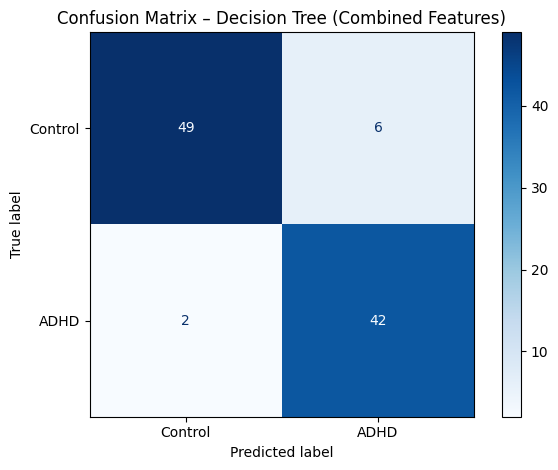

In [15]:
# Separate features and target
X_combined = merged_df.drop(columns="DX")
y_combined = merged_df["DX"]

# Train-test split
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    X_combined, y_combined, test_size=0.2, stratify=y_combined, random_state=45
)

# Standard scaling
scaler = StandardScaler()
X_trs_comb = scaler.fit_transform(X_train_comb)
X_tes_comb = scaler.transform(X_test_comb)

# Base Decision Tree model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=45)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=scorings,
    refit='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Fit the model
random_search.fit(X_trs_comb, y_train_comb)

# Predict on test set
y_pred_comb = random_search.best_estimator_.predict(X_tes_comb)

# Evaluation
print("Combined: PCA + ReHo + fALFF + Phenotype")
print("Best Params:", random_search.best_params_)
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")
print(classification_report(y_test_comb, y_pred_comb, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test_comb, y_pred_comb)



# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "ADHD"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Decision Tree (Combined Features)")
plt.tight_layout()
plt.show()


# Save result
# results.append({
#     'Dataset': 'Combined (All)',
#     'Best Params': random_search.best_params_,
#     'CV F1': random_search.best_score_,
#     'Test F1': f1_score(y_test_comb, y_pred_comb, average='weighted')
# })


In [58]:
results_df = pd.DataFrame(results)
results_df


,Dataset,Best Params,CV F1,Test F1
0,Functional Connectivity,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.581817,0.548387
1,FC + Phenotype,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.890945,0.889003
2,Functional Connectivity,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.581817,0.548387
3,PCA-FC Only,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.552810,0.492299
4,ReHo Only,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.593183,0.540654
5,fALFF Only,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.581277,0.547554
6,PCA + Phenotype,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.938925,0.929467
7,ReHo + Phenotype,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.938925,0.929467
8,fALFF + Phenotype,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.936577,0.929366
9,Combined (All),"{'min_samples_split': 10, 'min_samples_leaf': ...",0.936775,0.919424


In [23]:
pd.DataFrame(data = cm, 
            columns = pd.MultiIndex.from_tuples([("Model Predicted", "Control"), ("Model Predicted", "ADHD")]),
            index = pd.MultiIndex.from_tuples([("Actual Values", "Control"),("Actual Values", "ADHD")]))

Model Predicted     
                              Control ADHD
Actual Values Control              49    6
              ADHD                  2   42